### ДЗ к уроку 5 "Элементы теории вероятностей"

#### 1. Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [1]:
import numpy as np
import random

In [2]:
for i in range (0, 5):
    a = input()
    x = random.randint(0, 36)                     
    if x == 0:
        print(f'Выпало zero, зелёное поле')
    elif x in range(1, 10):
        if x % 2 == 0:
            print(f'Выпало {x} - чёрное поле')
        else:
            print(f'Выпало {x} - красное поле')
    elif x in range(11, 18):
        if x % 2 == 0:
            print(f'Выпало {x} - красное поле')
        else:
            print(f'Выпало {x} - чёрное поле')
    elif x in range(19, 28):
        if x % 2 == 0:
            print(f'Выпало {x} - чёрное поле')
        else:
            print(f'Выпало {x} - красное поле')
    else:
        if x % 2 == 0:
            print(f'Выпало {x} - чёрное поле')
        else:
            print(f'Выпало {x} - красное поле')   


Выпало 1 - красное поле

Выпало 15 - чёрное поле

Выпало 8 - чёрное поле

Выпало 30 - чёрное поле

Выпало 5 - красное поле


##### 2.1) Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.

Проверим, что для противоположных событий p(A) + p(B) = 1.

In [3]:
n = 1000                 # количество подбрасываний
k = list(np.random.randint(2, size = n)).count(1) # количество выпавших раз числа "1"
p1 = k / n               # вероятность выпадения числа "1"
p2 = (n - k) / n         # вероятность выпадения числа "0"
print(p1, p2, p1 + p2)

0.514 0.486 1.0


##### 2.2) Сгенерируйте десять выборок случайных чисел х0, …, х9. И постройте гистограмму распределения случайной суммы х0+х1+ …+ х9.

In [4]:
import matplotlib.pyplot as plt

In [5]:
x = [np.random.randint(0, 10, 10).sum() for i in range(10)]
x

[45, 43, 39, 50, 45, 40, 56, 46, 40, 46]

Text(0, 0.5, 'Доля, %')

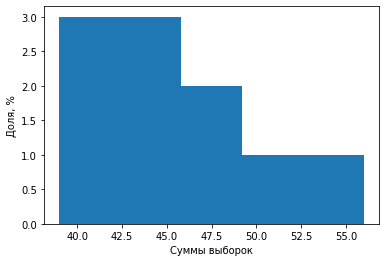

In [6]:
bins = 5
plt.hist((x), bins)
plt.xlabel('Суммы выборок')
plt.ylabel('Доля, %')

##### 3.1) Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) и сравните результаты.

а) повторяем код метода Монте-Карло из видео урока:

In [7]:
k, n = 0, 10000
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
x = a + b + c + d
for i in range(n):
    if x[i] == 2:
        k = k + 1
print(k / n)

0.375


б) пишем формулу Бернулли и вероятность выпадения пар двух успехов на четырех испытаниях:

In [8]:
def prob(k, n):
    C = np.math.factorial(n) / (np.math.factorial(k) * np.math.factorial(n - k))
    return C / 2 ** n

In [9]:
prob(2, 4)

0.375

Вывод: значения вероятности наступления событий схожая

3.2) Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k

In [10]:
prob(1, 5)

0.15625

In [11]:
prob(10, 20)

0.17619705200195312

##### 4. Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k

In [12]:
import itertools

In [13]:
print(len(list(itertools.permutations('123', 3))), '- возможное количество комбинаций')
print('Комбинации чисел:')
for i in itertools.permutations('123', 3):
    print(''.join(i))

6 - возможное количество комбинаций
Комбинации чисел:
123
132
213
231
312
321


##### 5. Дополните код расчетом коэффициента корреляции x и y по формуле

In [14]:
import warnings
warnings.filterwarnings('ignore')

0.6852620594508232 0.1685978500199491
0.6852620594508214 0.16859785001994992


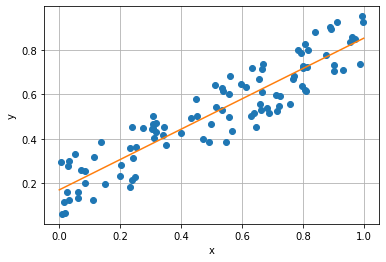

In [15]:
n = 100
r = 0.7
x = np.random.rand(n)
y = r * x + (1 - r) * np.random.rand(n)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

a = (np.sum(x) * np.sum(y) - n * np.sum(x * y)) / (np.sum(x) * np.sum(x) - n * np.sum(x * x))
b = (np.sum(y) - a * np.sum(x)) / n

A = np.vstack([x, np.ones(len(x))]).T
a1, b1 = np.linalg.lstsq(A, y)[0]
print(a, b)
print(a1, b1)
plt.plot([0, 1], [b, a + b])
plt.show()

In [16]:
c = np.sum((x - np.mean(x)) * (y - np.mean(y)))/np.sqrt(np.sum(np.square(x - np.mean(x))) * np.sum(np.square(y - np.mean(y))))
c1 = np.corrcoef(x, y)
print(c, c1[1][0])

0.9201858186451275 0.9201858186451278


Прим.: Проверил машинные вычисления с помощью встроенной функции np.orrcoef. Вычисления дают равный результат.